In [41]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:
# Load Data

data = pd.read_csv("../data/2010_-_2016_School_Safety_Report_20240118.csv")
data

,School Year,Building Code,DBN,Location Name,Location Code,Address,Borough,Geographical District Code,Register,Building Name,...,Borough Name,Postcode,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,2013-14,K001,15K001,P.S. 001 The Bergen,K001,309 47 STREET,K,15.0,"1,277",NaN,...,BROOKLYN,11220.0,40.649042,-74.012289,7.0,38.0,80.0,3011821.0,3.007550e+09,Sunset Park West ...
1,2013-14,K002,17K002,Parkside Preparatory Academy,K002,655 PARKSIDE AVENUE,K,17.0,479,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,...,BROOKLYN,11226.0,40.656183,-73.951583,9.0,40.0,802.0,3378201.0,3.050500e+09,Prospect Lefferts Gardens-Wingate ...
2,2013-14,K002,75K141,P.S. K141,K141,655 PARKSIDE AVENUE,K,17.0,397,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,...,BROOKLYN,11226.0,40.656183,-73.951583,9.0,40.0,802.0,3378201.0,3.050500e+09,Prospect Lefferts Gardens-Wingate ...
3,2013-14,K002,84K704,Explore Charter School,K704,655 PARKSIDE AVENUE,K,17.0,NaN,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,...,BROOKLYN,11226.0,40.656183,-73.951583,9.0,40.0,802.0,3378201.0,3.050500e+09,Prospect Lefferts Gardens-Wingate ...
4,2013-14,K002,NaN,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,NaN,655 PARKSIDE AVENUE,K,17.0,876,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,...,BROOKLYN,11226.0,40.656183,-73.951583,9.0,40.0,802.0,3378201.0,3.050500e+09,Prospect Lefferts Gardens-Wingate ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6305,2015-16,X972,08X519,Felisa Rincon de Gautier Institute for Law and...,X519,1440 STORY AVENUE,X,8.0,275,1440 STORY AVENUE CONSOLIDATED LOCATION,...,BRONX,10473.0,40.821146,-73.881479,9.0,17.0,28.0,2022544.0,2.036220e+09,Soundview-Castle Hill-Clason Point-Harding Par...
6306,2015-16,X972,08X537,Bronx Arena High School,X537,1440 STORY AVENUE,X,8.0,215,1440 STORY AVENUE CONSOLIDATED LOCATION,...,BRONX,10473.0,40.821146,-73.881479,9.0,17.0,28.0,2022544.0,2.036220e+09,Soundview-Castle Hill-Clason Point-Harding Par...
6307,2015-16,X972,NaN,1440 STORY AVENUE CONSOLIDATED LOCATION,NaN,1440 STORY AVENUE,X,8.0,490,1440 STORY AVENUE CONSOLIDATED LOCATION,...,BRONX,10473.0,40.821146,-73.881479,9.0,17.0,28.0,2022544.0,2.036220e+09,Soundview-Castle Hill-Clason Point-Harding Par...
6308,2015-16,X973,12X271,East Bronx Academy for the Future,X271,1716 SOUTHERN BOULEVARD,X,12.0,665,NaN,...,BRONX,10460.0,40.836356,-73.888361,3.0,17.0,161.0,2010604.0,2.029830e+09,Crotona Park East ...


In [4]:
data["Borough Name"].value_counts()

Borough Name
BROOKLYN     2044
BRONX        1551
MANHATTAN    1247
QUEENS       1189
STATEN IS     255
Name: count, dtype: int64

In [19]:
borough_major_df = data[["Borough Name", "Major N"]].groupby("Borough Name").sum().reset_index()
borough_major_df

,Borough Name,Major N
0,BRONX,483.0
1,BROOKLYN,554.0
2,MANHATTAN,373.0
3,QUEENS,289.0
4,STATEN IS,64.0


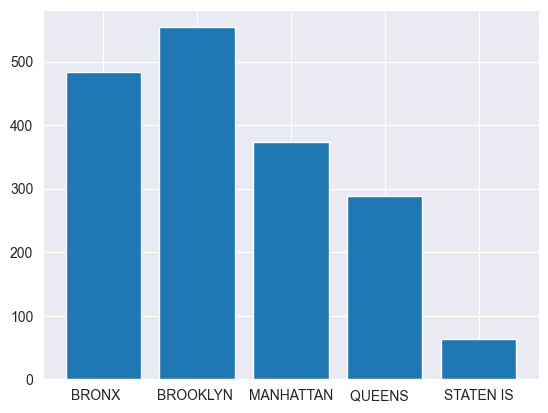

In [20]:
plt.bar(borough_major_df["Borough Name"],borough_major_df["Major N"])
plt.show()

In [31]:
sy_vio_df = data[["School Year", "Vio N"]].groupby("School Year").sum().reset_index()
sy_vio_df

,School Year,Vio N
0,2013-14,1073.0
1,2014-15,1049.0
2,2015-16,1058.0


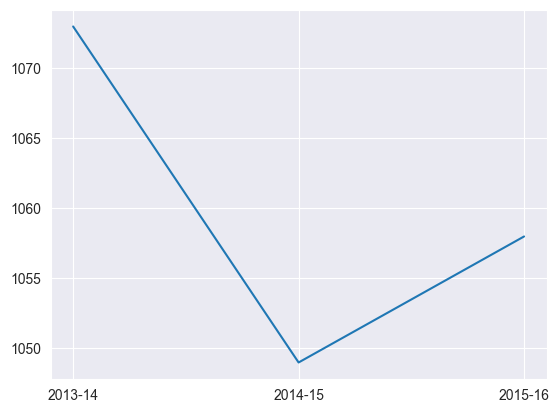

In [34]:
plt.plot(sy_vio_df["School Year"],sy_vio_df["Vio N"])
plt.show()
         

<Axes: xlabel='School Year', ylabel='Vio N'>

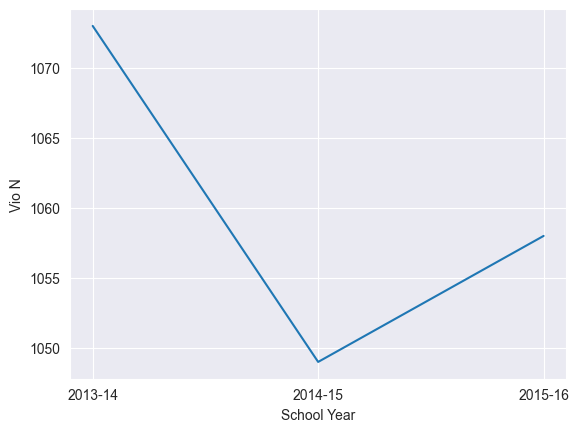

In [35]:
sns.lineplot(sy_vio_df, x="School Year", y="Vio N")

In [42]:
fig = px.line(sy_vio_df, x="School Year", y="Vio N", title="Distribution of Violence per year")
fig.show()

In [43]:
data["NTA"].value_counts()

NTA
East Concourse-Concourse Village                                               116
Stuyvesant Heights                                                             113
Brownsville                                                                    103
Crown Heights North                                                            102
East New York                                                                   97
                                                                              ... 
Ocean Parkway South                                                              3
College Point                                                                    3
Rossville-Woodrow                                                                3
Rikers Island                                                                    3
Kew Gardens                                                                      3
Name: count, Length: 189, dtype: int64

In [44]:
nta_propn_df = data[["NTA", "Prop N"]].groupby("NTA").sum().reset_index()
nta_propn_df

,NTA,Prop N
0,Allerton-Pelham Gardens ...,11.0
1,Annadale-Huguenot-Prince's Bay-Eltingville ...,33.0
2,Arden Heights ...,1.0
3,Astoria ...,36.0
4,Auburndale ...,24.0
...,...,...
184,Woodhaven ...,5.0
185,Woodlawn-Wakefield ...,5.0
186,Woodside ...,5.0
187,Yorkville ...,12.0


In [45]:
fig = px.line(nta_propn_df, x="NTA", y="Prop N", title="Showing of Property Violence in NTA")
fig.show()

In [49]:
fig = px.pie(nta_propn_df, names='NTA', values='Prop N', title='Showing of Property Violence in NTA')
fig.show()

In [50]:
map_df = data[["Latitude", "Longitude", "Prop N"]].groupby(["Latitude", "Longitude"]).sum().reset_index()
map_df

,Latitude,Longitude,Prop N
0,40.508284,-74.243428,1.0
1,40.508809,-74.222403,2.0
2,40.509037,-74.244118,2.0
3,40.510735,-74.231109,1.0
4,40.520699,-74.211264,1.0
...,...,...,...
1189,40.892151,-73.861466,1.0
1190,40.895104,-73.845968,0.0
1191,40.899295,-73.867500,0.0
1192,40.902205,-73.854829,0.0


In [54]:

fig = px.density_mapbox(map_df, lat='Latitude', lon='Longitude', z='Prop N', radius=10,
                        center=dict(lat=40, lon=-75), zoom=0,
                        mapbox_style="open-street-map")
fig.show()